### <font color='red'>README</font>: To drag the slider, run the individual cell again. Seemingly, Jupyter Notebook imposes the %matplotlib notebook command on the last executed cell and not for all cells simultaneously

# Problem 2: Logistic growth

# a. 
To Plot: $$N(t) = \frac{K}{1 + \left(\frac{K}{N_0} - 1\right)e^{-\mu t}}$$ 

   Also, to change and see how the parameters affect the solution.

In [1]:
# importing libraries

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from scipy.integrate import odeint

In [2]:
# Defining the function to be plotted

def logisticGrowth(K, N0, mu, t):
    denom = 1 + (K/N0 - 1)*np.exp(-mu*t)
    return K/denom

In [3]:
# Setting the initial value of the parameters
K_, N0_, mu_ = 3, 2, 3

# Defining the time axis array
t = np.arange(0, 5.1, 0.1)

# Getting the value of the Logistic Function for the input parameters
N = logisticGrowth(K_, N0_, mu_, t)

<IPython.core.display.Javascript object>


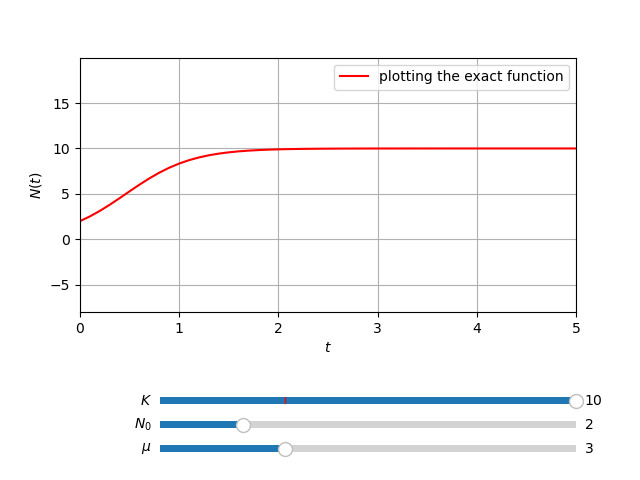

/tmp/ipykernel_8106/621335821.py:16: MatplotlibDeprecationWarning: Passing the valinit parameter of __init__() positionally is deprecated since Matplotlib 3.7; the parameter will become keyword-only two minor releases later.
  K = Slider(axK, "$K$", 0, 10, K_, valstep=0.25)
/tmp/ipykernel_8106/621335821.py:17: MatplotlibDeprecationWarning: Passing the valinit parameter of __init__() positionally is deprecated since Matplotlib 3.7; the parameter will become keyword-only two minor releases later.
  N0 = Slider(axN0, "$N_0$", 0, 10, N0_, valstep=0.25)
/tmp/ipykernel_8106/621335821.py:18: MatplotlibDeprecationWarning: Passing the valinit parameter of __init__() positionally is deprecated since Matplotlib 3.7; the parameter will become keyword-only two minor releases later.
  mu = Slider(axmu, "$\mu$", 0, 10, mu_, valstep=0.25)


In [7]:
# Plotting the initial Logistic Function
fig1, ax = plt.subplots()
ax.set_xlim([t[0], t[-1]])
plt.subplots_adjust(bottom = 0.35)

l, = plt.plot(t, N, color = "red", label = "plotting the exact function")



# Setting up the slider axes
axK = plt.axes([0.25, 0.15, 0.65, 0.03])
axN0 = plt.axes([0.25, 0.1, 0.65, 0.03])
axmu = plt.axes([0.25, 0.05, 0.65, 0.03])

# Adding sliders for different parameters viz. K, mu, N0
K = Slider(axK, "$K$", 0, 10, K_, valstep=0.25)
N0 = Slider(axN0, "$N_0$", 0, 10, N0_, valstep=0.25)
mu = Slider(axmu, "$\mu$", 0, 10, mu_, valstep=0.25)

# Updating the function as and when the sliders are dragged

def update(val):
    K_new = K.val
    N0_new = N0.val
    mu_new = mu.val
    l.set_ydata(logisticGrowth(K_new, N0_new, mu_new, t))
    
    # Redefining the y-axis limit every time the parameters are changed
    ax.set_ylim([min(logisticGrowth(K_new, N0_new, mu_new, t)) - 10, 
                max(logisticGrowth(K_new, N0_new, mu_new, t)) + 10])
     
# Updating the parameters
K.on_changed(update)
N0.on_changed(update)
mu.on_changed(update)

# Setting the axes labels and legend
ax.set_xlabel("$t$")
ax.set_ylabel("$N(t)$")
ax.legend(loc = "best")
ax.grid()

# b.
To show: $N(t)$ is a solution of $$\dot{N} = \mu N \left( 1 - \frac{N}{K}\right)$$

Ans. <br> <br>

$\because N(t) = \frac{K}{1 + \left(\frac{K}{N_0} - 1\right)e^{-\mu t}}  \implies \frac{K}{N} - 1 = \left( \frac{K}{N_0} - 1\right)e^{-\mu t}$ 

On differentiating $N(t) = \frac{K}{1 + \left(\frac{K}{N_0} - 1\right)e^{-\mu t}}$ on both sides w.r.t. $t$, we get:<br><br>
$\dot{N(t)}= \frac{K}{1 + \left( \frac{K}{N_0} - 1\right)e^{-\mu t}}\cdot \frac{1}{1 + \left( \frac{K}{N_0} - 1\right)e^{-\mu t}}\cdot\left(\frac{K}{N0} - 1\right)e^{-\mu t}$ <br><br>
$\dot{N(t)} = \mu N \frac{1}{1 + \left( \frac{K}{N_0} - 1\right)e^{-\mu t}}\cdot\left(\frac{K}{N0} - 1\right)e^{-\mu t}$ <br><br>
$\therefore \dot{N(t)} = \mu N \left(\frac{K}{N} - 1\right)\frac{N}{K} = \mu N \left(1-\frac{N}{K}\right)$

# c.
To integrate: numerically the differential equation from part b and compare it with the exact function

In [5]:
# Defining the ODE Model
def model(N, t, K, mu):
    dNdt = mu*N*(1-N/K)
    return dNdt

# Solving the ODE for intial values of parameters
N_calculated = odeint(model, N0_, t, args=(K_, mu_))

<IPython.core.display.Javascript object>


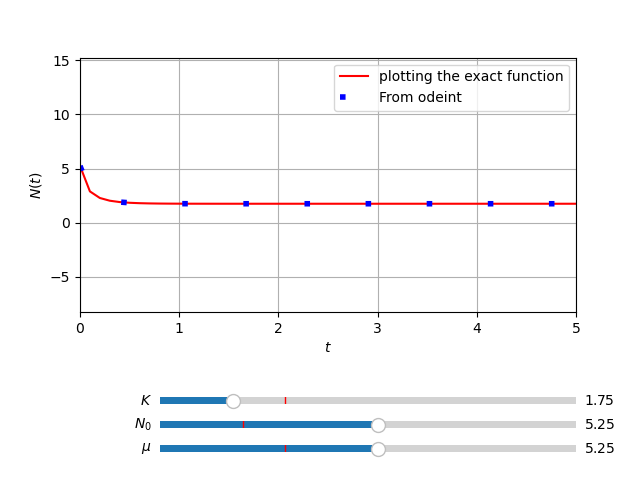

/tmp/ipykernel_8106/4223188243.py:22: MatplotlibDeprecationWarning: Passing the valinit parameter of __init__() positionally is deprecated since Matplotlib 3.7; the parameter will become keyword-only two minor releases later.
  K = Slider(axK, "$K$", 0, 10, K_, valstep=0.25)
/tmp/ipykernel_8106/4223188243.py:23: MatplotlibDeprecationWarning: Passing the valinit parameter of __init__() positionally is deprecated since Matplotlib 3.7; the parameter will become keyword-only two minor releases later.
  N0 = Slider(axN0, "$N_0$", 0, 10, N0_, valstep=0.25)
/tmp/ipykernel_8106/4223188243.py:24: MatplotlibDeprecationWarning: Passing the valinit parameter of __init__() positionally is deprecated since Matplotlib 3.7; the parameter will become keyword-only two minor releases later.
  mu = Slider(axmu, "$\mu$", 0, 10, mu_, valstep=0.25)


In [6]:
# Using the same code as for part a, but with calculated N incorporated into the sliders
# Plotting the initial Logistic Function

# Notice the name change in the figure object from fig1 to fig2
fig2, ax = plt.subplots()
ax.set_xlim([t[0], t[-1]])
plt.subplots_adjust(bottom = 0.35)

# Plots to store the exact solutions
l, = plt.plot(t, N, color = "red", label = "plotting the exact function")

# Plots to store the calculated solutions 
s, = plt.plot(t, N_calculated, linestyle=(0, (1, 10)), color="blue", linewidth = "4", label="From odeint")


# Setting up the slider axes
axK = plt.axes([0.25, 0.15, 0.65, 0.03])
axN0 = plt.axes([0.25, 0.1, 0.65, 0.03])
axmu = plt.axes([0.25, 0.05, 0.65, 0.03])

# Adding sliders for different parameters viz. K, mu, N0
K = Slider(axK, "$K$", 0, 10, K_, valstep=0.25)
N0 = Slider(axN0, "$N_0$", 0, 10, N0_, valstep=0.25)
mu = Slider(axmu, "$\mu$", 0, 10, mu_, valstep=0.25)

# Updating the function as and when the sliders are dragged

def update(val):
    K_new = K.val
    N0_new = N0.val
    mu_new = mu.val
    
    l.set_ydata(logisticGrowth(K_new, N0_new, mu_new, t))
    
    # Plotting the new plot everytime the parameters change    
    N_calculated_new = odeint(model, N0_new, t, args=(K_new, mu_new))
    s.set_ydata(N_calculated_new)

    # Redefining the y-axis limit every time the parameters are changed
    ax.set_ylim([min(logisticGrowth(K_new, N0_new, mu_new, t)) - 10, 
                max(logisticGrowth(K_new, N0_new, mu_new, t)) + 10])
     
# Updating the parameters
K.on_changed(update)
N0.on_changed(update)
mu.on_changed(update)

# Setting the axes labels and legend
ax.set_xlabel("$t$")
ax.set_ylabel("$N(t)$")
ax.legend(loc = "best")
ax.grid()